<a href="https://colab.research.google.com/github/kirilrusev00/text-summarization/blob/seq2seq/seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seq2Seq Model

## Install necessary libraries

In [ ]:
# Note: You may need to restart your kernel!
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install pandas
!pip3 install sklearn

## Imports

In [ ]:
import pandas as pd

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Master/IR/wikihowAll.csv')

In [ ]:
df.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [ ]:
df = df.dropna()

## Prepare dataset

In [ ]:
prepare_df = pd.DataFrame()
prepare_df['summary'] = df['headline']
prepare_df['text'] = df['text']

prepare_df.head()

,summary,text
0,"\nKeep related supplies in the same area.,\nMa...","If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...","As you start planning for a project or work, ..."


### Clean the data

In [ ]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):
  for row in column:
    row = str(row)

    row = row.rstrip()
    row = re.sub("(\\t)", " ", row).lower()
    row = re.sub("(\\r)", " ", row).lower()
    row = re.sub("(\\n)", " ", row).lower()

    # Remove _ if it occurs more than one time consecutively
    row = re.sub("(__+)", " ", row).lower()

    # Remove - if it occurs more than one time consecutively
    row = re.sub("(--+)", " ", row).lower()

    # Remove ~ if it occurs more than one time consecutively
    row = re.sub("(~~+)", " ", row).lower()

    # Remove + if it occurs more than one time consecutively
    row = re.sub("(\+\++)", " ", row).lower()

    # Remove . if it occurs more than one time consecutively
    row = re.sub("(\.\.+)", " ", row).lower()

    # Remove the characters - <>()|&©ø"',;?~*!
    row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", row).lower()

    # Remove punctuations at the end of a word
    row = re.sub("(\.\s+)", " ", row).lower()
    row = re.sub("(\-\s+)", " ", row).lower()
    row = re.sub("(\:\s+)", " ", row).lower()

    # Replace any url to only the domain name
    try:
      url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", row)
      repl_url = url.group(3)
      row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, row)
    except:
      pass

    # Remove numbers at end of words
    try:
      word_with_digit = re.search(r"([A-Za-z]+)\d+", row)
      word_without_digit = word_with_digit.group(1)
      row = re.sub(r"([A-Za-z]+)\d+", word_without_digit, row)
    except:
      pass

    # Remove multiple spaces
    row = re.sub("(\s+)", " ", row).lower()

    # Remove the single character hanging between any two spaces
    row = re.sub("(\s+.\s+)", " ", row).lower()

    yield row

In [ ]:
processed_text = text_strip(prepare_df['text'])
processed_summary = text_strip(prepare_df['summary'])

In [ ]:
prepare_df.head()

,summary,text
0,"\nKeep related supplies in the same area.,\nMa...","If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...","As you start planning for a project or work, ..."


In [ ]:
import spacy
from time import time

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=500)]

summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=500)]

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
text[0]

'if you re photographer keep all the necessary lens cords and batteries in the same quadrant of your home or studio paints should be kept with brushes cleaner and canvas print supplies should be by the ink etc make broader groups and areas for your supplies to make finding them easier limiting your search to much smaller area some ideas include essential supplies area the things you use every day inspiration and reference area dedicated work area infrequent or secondary supplies area tucked out of the way this doesn mean cleaning the entire studio it just means keeping the area immediately around the desk easel pottery wheel etc clean each night discard trash or unnecessary materials and wipe down dirty surfaces endeavor to leave the workspace in way that you can sit down the next day and start working immediately without having to do any work or tidying even if the rest of your studio is bit disorganized an organized workspace will help you get down to business every time you want to 

In [ ]:
summary[0]

'_START_  keep related supplies in the same area make an effort to clean dedicated workspace after every session place loose supplies in large clearly visible containers use clotheslines and clips to hang sketches photos and reference material use every inch of the room for storage especially vertical space use chalkboard paint to make space for drafting ideas right on the walls purchase label maker to make your organization strategy semi-permanent make habit of throwing out old excess or useless stuff each month. _END_'

In [ ]:
with open("output_text.txt", "w") as txt_file:
    for line in text:
        txt_file.write(line + "\n")

In [ ]:
with open("output_summary.txt", "w") as txt_file:
    for line in summary:
        txt_file.write(line + "\n")

In [ ]:
prepare_df['cleaned_text'] = pd.Series(text)
prepare_df['cleaned_summary'] = pd.Series(summary)

### Save prepared dataset to csv

In [ ]:
prepare_df.to_csv('cleaned.csv', index=False)

## Filter examples by word size

In [ ]:
prepare_df = pd.read_csv('/content/drive/MyDrive/Master/IR/cleaned.csv')

In [ ]:
prepare_df.head()

,summary,text,cleaned_text,cleaned_summary
0,"\nKeep related supplies in the same area.,\nMa...","If you're a photographer, keep all the necess...",if you re photographer keep all the necessary...,_START_ keep related supplies in the same are...
1,\nCreate a sketch in the NeoPopRealist manner ...,See the image for how this drawing develops s...,see the image for how this drawing develops s...,_START_ create sketch in the neopoprealist ma...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",It is possible to become a VFX artist without...,it is possible to become vfx artist without c...,_START_ get bachelor’s degree enroll in studi...
3,\nStart with some experience or interest in ar...,The best art investors do their research on t...,the best art investors do their research on t...,_START_ start with some experience or interes...
4,"\nKeep your reference materials, sketches, art...","As you start planning for a project or work, ...",as you start planning for project or work you...,_START_ keep your reference materials sketche...


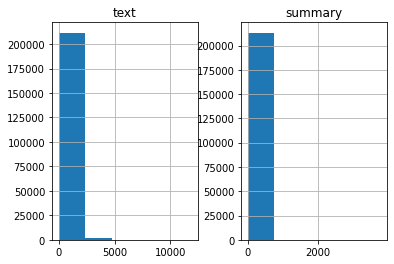

In [ ]:
import matplotlib.pyplot as plt

prepare_df = prepare_df.dropna()

text_count = []
summary_count = []

for sent in prepare_df['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in prepare_df['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

### Check how much % of text have 0-150 words

In [ ]:
cnt = 0
for i in prepare_df['cleaned_text']:
    if len(i.split()) <= 150:
        cnt = cnt + 1
print(cnt / len(prepare_df['cleaned_text']))

0.2796154297103998


### Check how much % of summaries have 0-25 words

In [ ]:
cnt = 0
for i in prepare_df['cleaned_summary']:
    if len(i.split()) <= 25:
        cnt = cnt + 1
print(cnt / len(prepare_df['cleaned_summary']))

0.2417962246453277


### Model to summarize the text between 0-25 words for Summary and 0-150 words for Text

In [ ]:
max_text_len = 150
max_summary_len = 25

### Select the Summaries and Text which fall below max length

In [ ]:
import numpy as np

cleaned_text = np.array(prepare_df['cleaned_text'])
cleaned_summary= np.array(prepare_df['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head(2)

,text,summary
0,while watching television pay close attention...,_START_ watch television advertisements deter...
1,the celery stalk should be twice as long or l...,_START_ gather celery stalk and carrot slide ...


# Add sostok and eostok tokens around the summaries

In [ ]:
post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x + ' eostok')

post_pre.head(2)

,text,summary
0,while watching television pay close attention...,sostok _START_ watch television advertisement...
1,the celery stalk should be twice as long or l...,sostok _START_ gather celery stalk and carrot...


## Tokenizing the Text

### Split to train and test data

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']), test_size=0.1, random_state=0, shuffle=True)

# Prepare a tokenizer on training text data

In [ ]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

### Find the percentage of occurrence of rare words (in less than 5 texts)

In [ ]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  65.61924223644098


### Prepare a tokenizer by not considering the rare words

In [ ]:
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 10264


### Prepare a tokenizer on testing data

In [ ]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 72.90037648421662
Size of vocabulary in Y = 3744


### Remove empty Summaries from train data, .i.e, which only have 'START' and 'END' tokens

In [ ]:
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

### Remove empty Summaries from validation data, .i.e, which only have 'START' and 'END' tokens

In [ ]:
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

## ‍Implement Seq2Seq Model

## Imports

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

## Define neural network architecture

In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 150, 200)     2052800     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 150, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

## Train the model

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
import tensorflow as tf

history = model.fit([x_tr, y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:], epochs=50, callbacks=[es], batch_size=128, validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:,1:]))

Epoch 1/50
94/94 [==============================] - 1307s 14s/step - loss: 4.8010 - val_loss: 4.1120
Epoch 2/50
94/94 [==============================] - 1289s 14s/step - loss: 3.9836 - val_loss: 3.7441
Epoch 3/50
94/94 [==============================] - 1466s 16s/step - loss: 3.8388 - val_loss: 3.6871
Epoch 4/50
94/94 [==============================] - 1353s 14s/step - loss: 3.7836 - val_loss: 3.6365
Epoch 5/50
94/94 [==============================] - 1348s 14s/step - loss: 3.7282 - val_loss: 3.5868
Epoch 6/50
94/94 [==============================] - 1330s 14s/step - loss: 3.6811 - val_loss: 3.5511
Epoch 7/50
94/94 [==============================] - 1332s 14s/step - loss: 3.6406 - val_loss: 3.5205
Epoch 8/50
94/94 [==============================] - 1333s 14s/step - loss: 3.6031 - val_loss: 3.4820
Epoch 9/50
94/94 [==============================] - 1338s 14s/step - loss: 3.5667 - val_loss: 3.4490
Epoch 10/50
94/94 [==============================] - 1322s 14s/step - loss: 3.5321 - val_lo

### Plot the training and validation loss metrics

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Generating Predictions

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
from rouge import Rouge

def evaluate_rouge_score(reference_summaries, generated_summaries):
    rouge_scores = []
    for reference_summary, generated_summary in zip(reference_summaries, generated_summaries):
        reference_summary = ' '.join(reference_summary)
        generated_summary = ' '.join(generated_summary)
        rouge_scores.append(Rouge().get_scores(generated_summary, reference_summary, avg=True))
    return rouge_scores 

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu_score(reference_summaries, generated_summaries):
    bleu_scores = []
    for reference_summary, generated_summary in zip(reference_summaries, generated_summaries):
        reference_summary = ' '.join(reference_summary)
        generated_summary = ' '.join(generated_summary)
        bleu_scores.append(sentence_bleu([reference_summary], generated_summary))
        
    return bleu_scores

In [ ]:
len(x_tr)

In [ ]:
len(y_tr)

In [ ]:
reference_summaries = [seq2summary(summary) for summary in y_tr]

print("Generating summaries")
generated_summaries = [decode_sequence(x_tr[i].reshape(1, max_text_len)) for text in x_tr]

print("Evaluating rouge scores")
# Evaluate the generated summaries using the ROUGE score
rouge_scores = evaluate_rouge_score(reference_summaries, generated_summaries)

total_precision_1 = 0

total_recall_1 = 0

total_f_1 = 0

total_precision_l = 0

total_recall_l = 0

total_f_l = 0

for k in rouge_scores:
    total_precision_1 += k['rouge-1']['p']
    total_recall_1 += k['rouge-1']['r']
    total_f_1 += k['rouge-1']['f']
    total_precision_l += k['rouge-l']['p']
    total_recall_l += k['rouge-l']['r']
    total_f_l += k['rouge-l']['f']

print('Average Rouge-1 score precision:', total_precision_1 / i)
print('Average Rouge-1 score recall:', total_recall_1 / i)
print('Average Rouge-1 score f :', total_f_1 / i)

print('Average Rouge-l score precision:', total_precision_l / i)
print('Average Rouge-l score recall:', total_recall_l / i)
print('Average Rouge-l score f :', total_f_l / i)


print("Evaluating BLEU scores")
# Evaluate the generated summaries using the BLEU score
bleu_scores = evaluate_bleu_score(reference_summaries, generated_summaries)

# Average BLEU score
avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
print("Average BLEU score:", avg_bleu_score)

In [ ]:
for i in range(0, 19):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1, max_text_len)))
    print ('\n')